<a href="https://colab.research.google.com/github/HugocamposL3/Data-Science-Big-Data/blob/main/Atividade_Sobre_K_Means_Agrupamento_Flor_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### K-Means - Exemplo

Projeto adaptado do link: 
https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/

###1. Imports e Carga dos dados

In [1]:
# 1.1 - Import das bibliotecas
import pandas as pd # Para transformar o dataset em um dataframe
import matplotlib.pyplot as plt # Para plotar gráficos
from sklearn.datasets import load_iris # Para importar ferramentas de clusteização

In [2]:
# 1.2 - Carga do Iris dataset
iris = load_iris()

In [3]:
# Ainda não é um DataFrama
type(iris)

sklearn.utils.Bunch

In [8]:
# Para saber os features do dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# 1.3 - criando o dataframe 
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [6]:
# Agora sim é um dataframe
type(df)

pandas.core.frame.DataFrame

In [7]:
# Esse dataset já está rotulado, mas vamos fazer de conta que ele não está rotulado
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2 - Análise Exploratória dos Dados 

In [9]:
# 2.1 - visualizando as primeiras instâncias de dados (os dados estão nas linhas) não aparece a classe embora já esteja classificado
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# 2.2 - visualizando as primeiras instâncias de dados (os dados estão nas colunas)
df.head().T

,0,1,2,3,4
sepal length (cm),5.1,4.9,4.7,4.6,5.0
sepal width (cm),3.5,3.0,3.2,3.1,3.6
petal length (cm),1.4,1.4,1.3,1.5,1.4
petal width (cm),0.2,0.2,0.2,0.2,0.2


In [ ]:
# 2.3 - conhecendo os tipos de dados do dataset
df.info()

### 3 - Treinando o k-Means

In [12]:
# 3.1 - padronização dos dados (método min-max)
df_scaled = (df - df.min())/(df.max()-df.min())

In [13]:
# 3.2 - exibindo os dados padronizados
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [14]:
df_scaled.head().T

,0,1,2,3,4
sepal length (cm),0.222222,0.166667,0.111111,0.083333,0.194444
sepal width (cm),0.625000,0.416667,0.500000,0.458333,0.666667
petal length (cm),0.067797,0.067797,0.050847,0.084746,0.067797
petal width (cm),0.041667,0.041667,0.041667,0.041667,0.041667


In [15]:
# 3.3 - carregando a biblioteca do KMeans
from sklearn.cluster import KMeans

In [23]:
# 3.4 - instanciando o agrupador
jose = KMeans(n_clusters = 3, init = 'random') # Posição do centróide aleatório com 3 centróides -  também pode ser assim KMeans(n_clusters = 3, init = 'random', max.iter = 200)

In [24]:
# 3.5 - fazendo o agrupamento
jose.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [27]:
# 3.6 - Exibindo as coordenadas dos centroids
jose.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333]])

In [32]:
# 3.7 - Usando fid_transform() para retornar a tabela de distâncias
distancias = jose.fit_transform(df_scaled)

In [ ]:
# 3.8 - exibindo a tabela de distâncias
distancias

In [34]:
# 3.9 - exibindo o resultado da classificação
jose.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

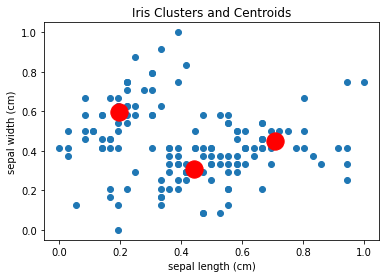

In [37]:
# 3.10 para plotar um gráfico de pontos com cores
plt.scatter(df_scaled.iloc[:,0], df_scaled.iloc[:,1]) # Escolha das colunas (sepal length e sepal width) eixo X e Eixo y
plt.scatter(jose.cluster_centers_[:, 0], jose.cluster_centers_[:, 1], s=300, c='red')
plt.title('Iris Clusters and Centroids')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

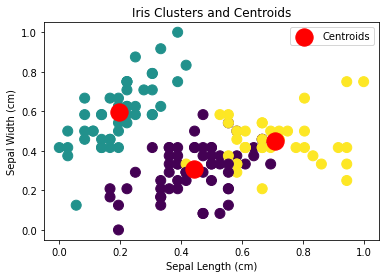

In [39]:
# 3.10 para plotar um gráfico de pontos com cores
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:,1], s = 100, c = jose.labels_)# Escolha das colunas (sepal length e sepal width) eixo X e Eixo y - C = cores do labels - S = tamanho dos pontos   
plt.scatter(jose.cluster_centers_[:, 0], jose.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids') # S = tamanho dos centroides 
plt.title('Iris Clusters and Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

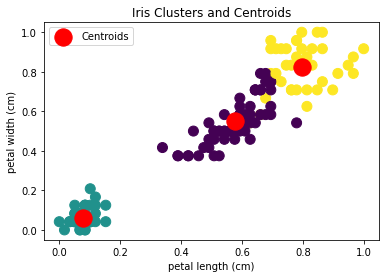

In [41]:
plt.scatter(df_scaled.iloc[:, 2], df_scaled.iloc[:,3], s = 100, c = jose.labels_)# Escolha das colunas (sepal length e sepal width) eixo X e Eixo y - C = cores do labels - S = tamanho dos pontos   
plt.scatter(jose.cluster_centers_[:, 2], jose.cluster_centers_[:, 3], s = 300, c = 'red',label = 'Centroids') # S = tamanho dos centroides 
plt.title('Iris Clusters and Centroids')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

### 4 - O método do Cotovelo (Elbow Method)

In [46]:
# 4.1 - criando o array para armazenar o Within-Cluster-Sum-of-Squares
wcss = []

In [47]:
# 4.2 - Executando k-means variando o número de agrupamentos
# o atributo inertia_ corresponde ao somatório dos erros quadráticos das instâncias de cada cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(df_scaled)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  

1 41.16611042137328
2 12.127790750538194
3 6.982216473785234
4 5.516933472040371
5 4.580948640117294
6 4.0408543198348
7 3.4765701484818883
8 3.1605536541727757
9 2.810480399396186
10 2.7062214100658397


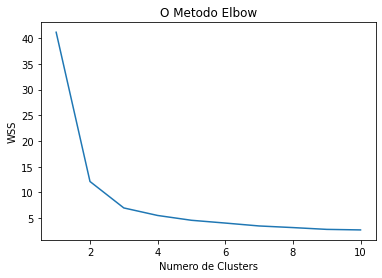

In [48]:
# 4.3 - gráfico do cotovelo  - Seguindo pelo o gráfico o numero de K's ideias é o numero 03.
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

### 5 - Classificando novos dados

In [49]:
# 5.1 - criando novos dados
novos_dados = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]

In [52]:
#5.1a - Criando um k-means novo pq os novos dados não estão escalados
maria = KMeans(n_clusters=3,init='random')
maria.fit(df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [53]:
# 5.2 - Encontrando a classe
maria.predict(novos_dados)

array([2, 1, 0], dtype=int32)

# Atividade

Implementar o método de Agrupamento k-Means de uma das seguintes fontes:



1. https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572

2. https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

3. https://datatofish.com/k-means-clustering-python/











